In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt

In [157]:
# df = pd.read_csv('2020_to_2021_features.csv')

In [5]:
ensign_df = pd.read_csv('../cms_provider_info/ensign_facilities.csv')
ensign_df = ensign_df.astype({'ccn': str})
# df = df.astype({'Federal Provider Number': str})

In [111]:
prov_nums = ensign_df['ccn'].squeeze().squeeze().tolist()

In [112]:
final_nums = []
for n in prov_nums:
    if len(n) < 6:
        n = '0' + n
    final_nums.append(n)

In [113]:
final_nums

['455754',
 '455637',
 '675689',
 '455934',
 '455934',
 '455745',
 '675901',
 '675901',
 '675972',
 '675272',
 '675272',
 '675560',
 '675962',
 '675081',
 '675081',
 '455625',
 '455925',
 '455586',
 '675111',
 '675593',
 '675593',
 '675743',
 '676190',
 '455576',
 '676010',
 '676010',
 '675651',
 '675766',
 '676395',
 '675925',
 '675645',
 '676081',
 '676194',
 '676251',
 '676137',
 '676230',
 '676253',
 '676029',
 '676048',
 '676220',
 '675774',
 '676272',
 '676049',
 '676238',
 '676158',
 '676113',
 '676312',
 '676042',
 '676392',
 '676421',
 '555070',
 '056364',
 '055706',
 '055430',
 '056337',
 '056360',
 '505074',
 '056411',
 '056328',
 '056215',
 '055756',
 '055987',
 '055734',
 '055744',
 '055353',
 '055182',
 '056014',
 '056104',
 '055237',
 '555249',
 '055067',
 '056372',
 '055394',
 '055505',
 '555425',
 '555478',
 '555458',
 '055374',
 '555257',
 '555796',
 '555770',
 '555326',
 '505081',
 '505434',
 '465069',
 '465072',
 '135011',
 '465109',
 '465100',
 '465091',
 '465104',

In [114]:
len(final_nums)

241

In [115]:
df['ensign'] = df['Federal Provider Number'].isin(final_nums)

In [158]:
df['occupancy'] = df['Average Number of Residents per Day']/df['Number of Certified Beds']

In [159]:
ensign_snf_df = df[df['ensign'] == True]

In [160]:
ensign_snf_df.columns

Index(['Federal Provider Number', 'Provider Name', 'Provider City',
       'Provider State', 'Provider Zip Code', 'Provider SSA County Code',
       'Provider County Name', 'Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents per Day', 'Provider Type', 'month', 'year',
       'ensign', 'occupancy'],
      dtype='object')

In [144]:
# x = final_nums
# x.sort()
# no_repeat_nums = []
# for i in range(len(x)-1, 0, -1):
#     if x[i] == x[i-1]:
#         del x[i]

In [161]:
# ensign_snf_df.to_csv('ensign_snf_2020_to_2021.csv', index = False)
# df.to_csv('2020_to_2021_all_features.csv', index = False)

In [162]:
df_ca = df[df['Provider State'] == 'CA']

In [163]:
ensign_ca = ensign_snf_df[ensign_snf_df['Provider State'] == 'CA']

In [164]:
ensign_ca.to_csv('ensign_snf/ensign_ca_2020_to_2021.csv', index = False) 

In [165]:
df_ca.to_csv('all_us_snf/all_ca_2020_to_2021.csv', index=False)

In [4]:
# nationwide, 3206 rows with occupancy > 100%
df[df['occupancy'] > 1].count()

# include occupancy <= 1 only
df_occupancy = df[df['occupancy'] <=1]

In [5]:
df_2020 = df_occupancy[df_occupancy['year'] == 2020]
df_2021 = df_occupancy[df_occupancy['year'] == 2021]

In [6]:
# facilities with occupancy > 100% - 389 rows
df_ca[df_ca['occupancy'] > 1]['Federal Provider Number'].nunique()

76

In [7]:
df_ca_occupancy = df_ca[df_ca['occupancy'] <= 1]

In [8]:
df_ca_2020 = df_ca_occupancy[df_ca_occupancy['year'] == 2020]
df_ca_2021 = df_ca_occupancy[df_ca_occupancy['year'] == 2021]

In [9]:
df_ca_2020['occupancy'].describe()

count    12754.000000
mean         0.851200
std          0.121018
min          0.012935
25%          0.806976
50%          0.886364
75%          0.933014
max          1.000000
Name: occupancy, dtype: float64

In [10]:
df_ca_2021['occupancy'].describe()

count    8159.000000
mean        0.744089
std         0.140357
min         0.010417
25%         0.661017
50%         0.764078
75%         0.844928
max         1.000000
Name: occupancy, dtype: float64

Text(0.5, 0, 'certified bed occupancy')

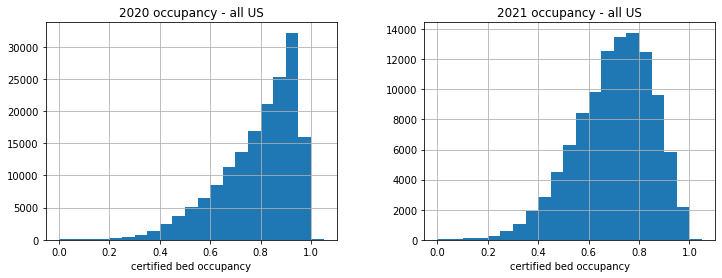

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
df_2020.hist('occupancy', bins=np.arange(0, df_2020['occupancy'].max() + 0.1, 0.05) , ax=axes[0])
axes[0].set_title('2020 occupancy - all US')
axes[0].set_xlabel('certified bed occupancy')
df_2021.hist('occupancy', bins=np.arange(0, df_2021['occupancy'].max() + 0.1, 0.05) , ax=axes[1])
axes[1].set_title('2021 occupancy - all US')
axes[1].set_xlabel('certified bed occupancy')

Text(0.5, 0, 'certified bed occupancy')

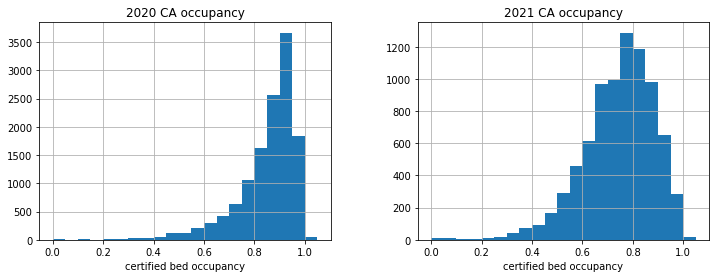

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
df_ca_2020.hist('occupancy', bins=np.arange(0, df_ca_2020['occupancy'].max() + 0.1, 0.05) , ax=axes[0])
axes[0].set_title('2020 CA occupancy')
axes[0].set_xlabel('certified bed occupancy')
df_ca_2021.hist('occupancy', bins=np.arange(0, df_ca_2021['occupancy'].max() + 0.1, 0.05) , ax=axes[1])
axes[1].set_title('2021 CA occupancy')
axes[1].set_xlabel('certified bed occupancy')

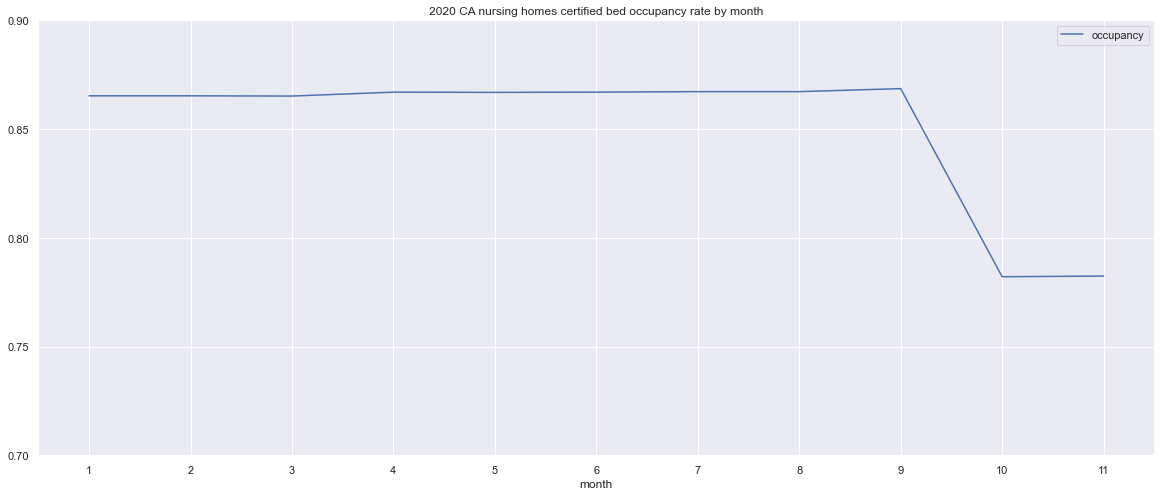

In [13]:
sns.set(rc={"figure.figsize":(20, 8)})
df_ca_2020.groupby('month')['occupancy'].mean().plot(xticks=np.arange(1,12), yticks=np.arange(0.7, 0.9, 0.05),
                                                     title= '2020 CA nursing homes certified bed occupancy rate by month', legend=True);

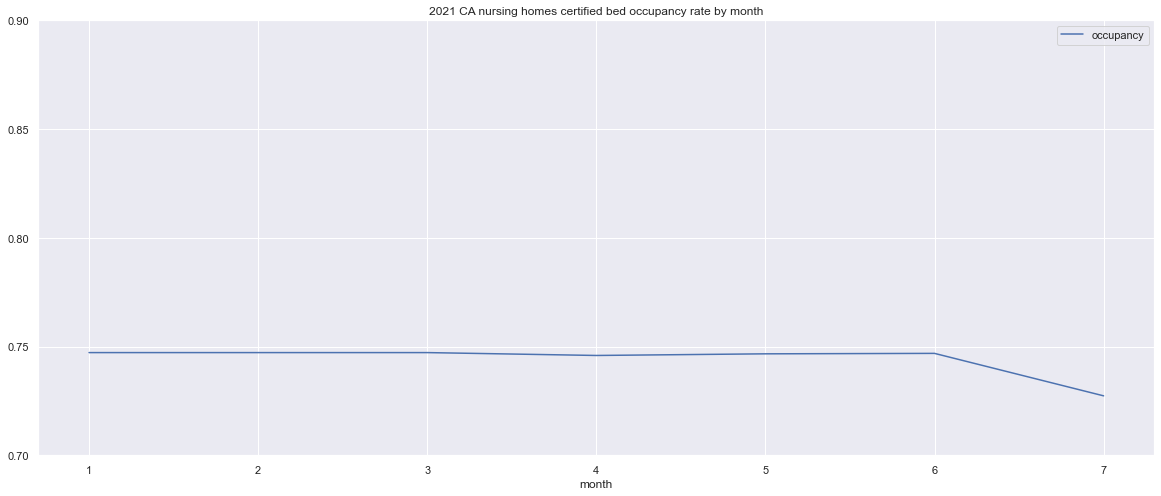

In [14]:
df_ca_2021.groupby('month')['occupancy'].mean().plot(xticks=np.arange(1,8), yticks=np.arange(0.7, 0.9, 0.05),
                                                     title='2021 CA nursing homes certified bed occupancy rate by month', legend=True);